Karen Gong

PHYS 434 HW 5

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)
plt.rcParams['pcolor.shading'] = 'auto'

Problem 1

First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest $σ$, say in the range 2-5. Create a million background events.

For this problem use $3σ$ signal.

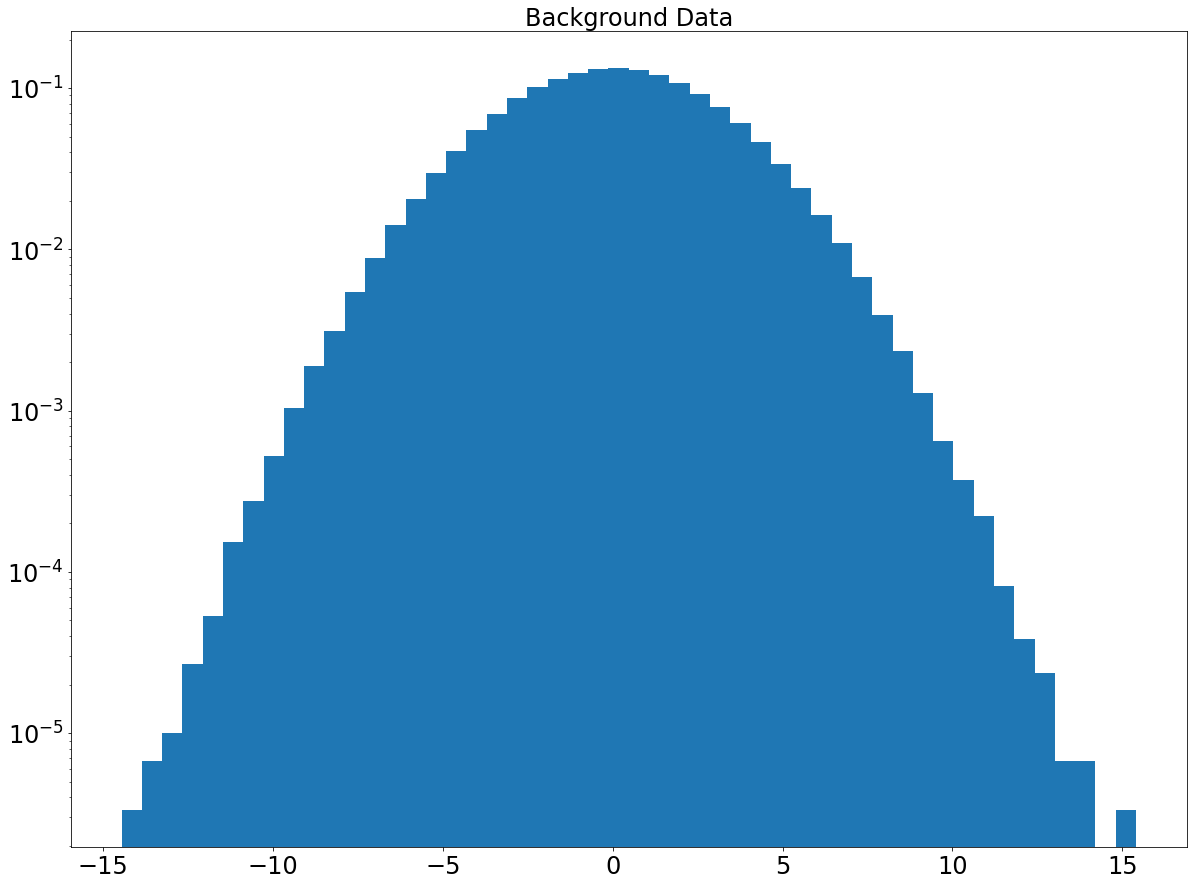

In [4]:
# use 3σ signal
bkgd = stats.norm.rvs(scale = 3, size = 1000000)

fig, ax = plt.subplots(1, 1)
ax.hist(bkgd,50, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.title("Background Data", size = 24)
plt.show()

Now we need to make some signal. Let us choose to make signals of random strength on the interval of 0-20. It is critical to throw these using a uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint  (near zero) as large/bright (near 20). Mathematically this is the $P(signal)$ in the equation. If you use another way of simulating signals that does not have a uniform distribution, you are injecting an implicit prior (very, very bad).

In [2]:
signal = np.random.uniform(0,21, 1000000)

Now add your signal to your background to create fake data readings. Since you know what the true signal was for each data reading, and you used a flat prior, you now have $P(data|signal)P(signal)$.

Text(0.5, 0, 'Observed data, $P(d|s)$')

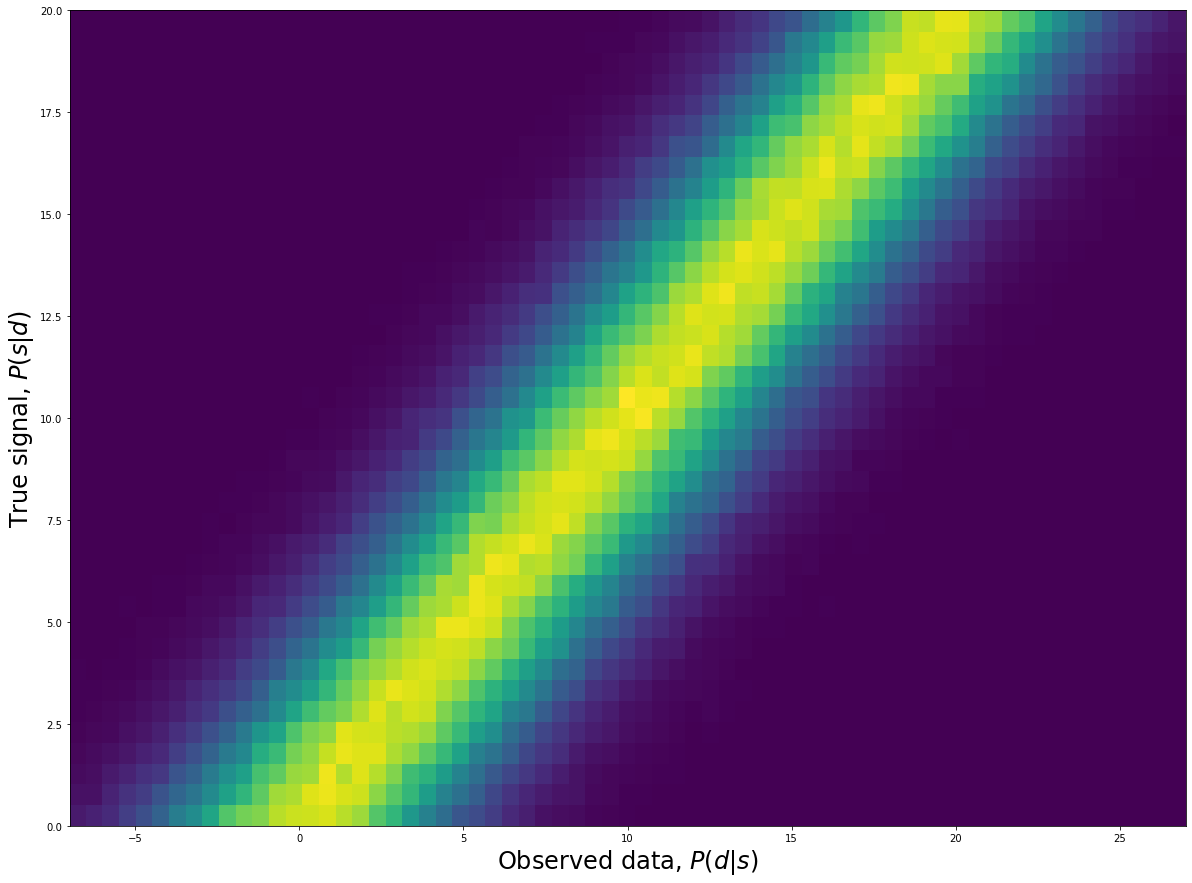

In [5]:
data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2 = np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

Now to explore this we can take slices of the above. We can look at our array edges and pick a vertical or horizontal stripe.

Problem 1b

Select a true injected signal and plot  $P(d|s)$ . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. (Hint: this was also shown in class.) 

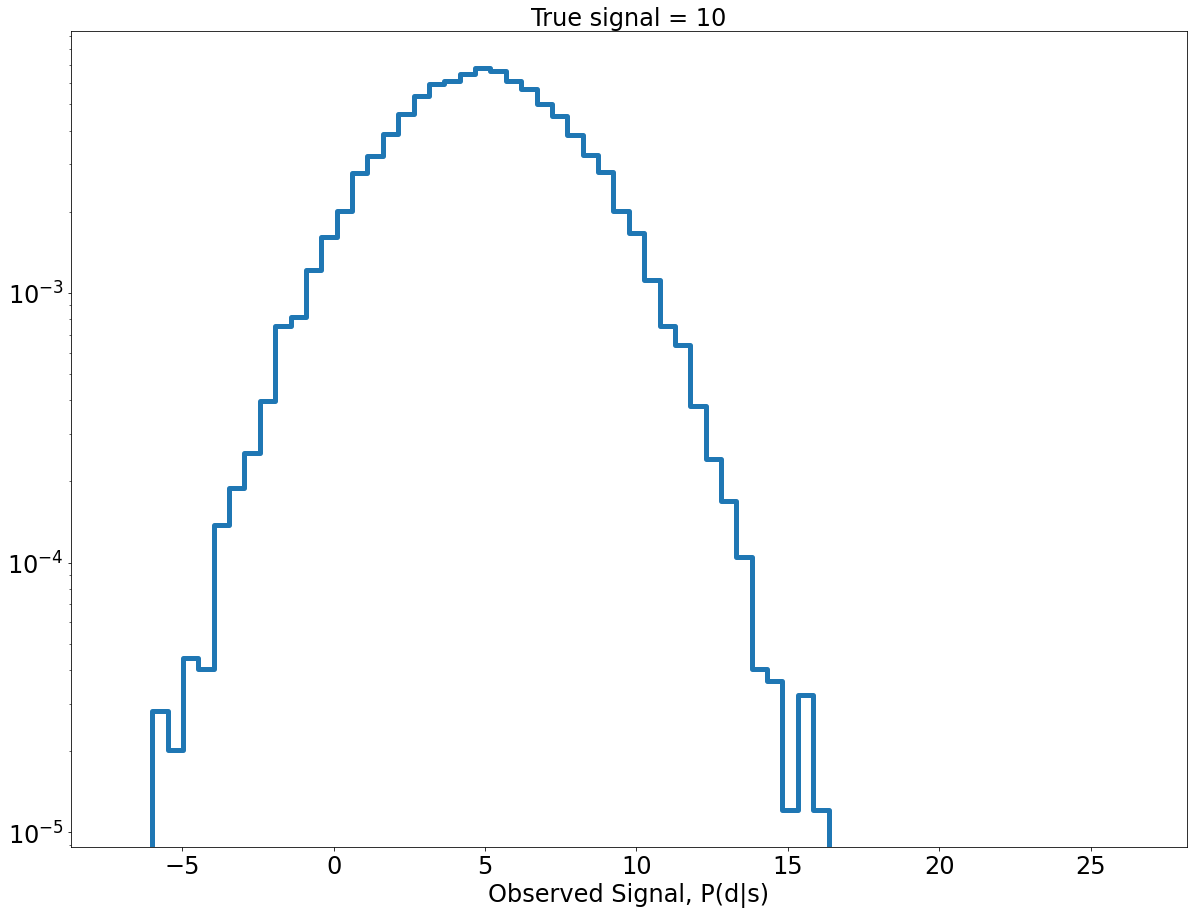

5.0


In [111]:
# select true signal to be 10
# horizontal stripe
horizontal = Psd[:,10]

plt.step(temp[:-1], horizontal, linewidth = 5)
plt.tick_params(labelsize = 24)
plt.yscale("log")
plt.title("True signal = 10", size = 24)
plt.xlabel("Observed Signal, P(d|s)", size = 24)
plt.show()

#plt.step(x,vertical)
#plt.yscale("log")

Here I plotted the observed signal when the true signal is at 10. At true signal equals 10, the observed signal shows a Gaussian-like distribution with a mean at 5.

Problem 1c

Select an observed data value and plot $P(s|d)$. (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

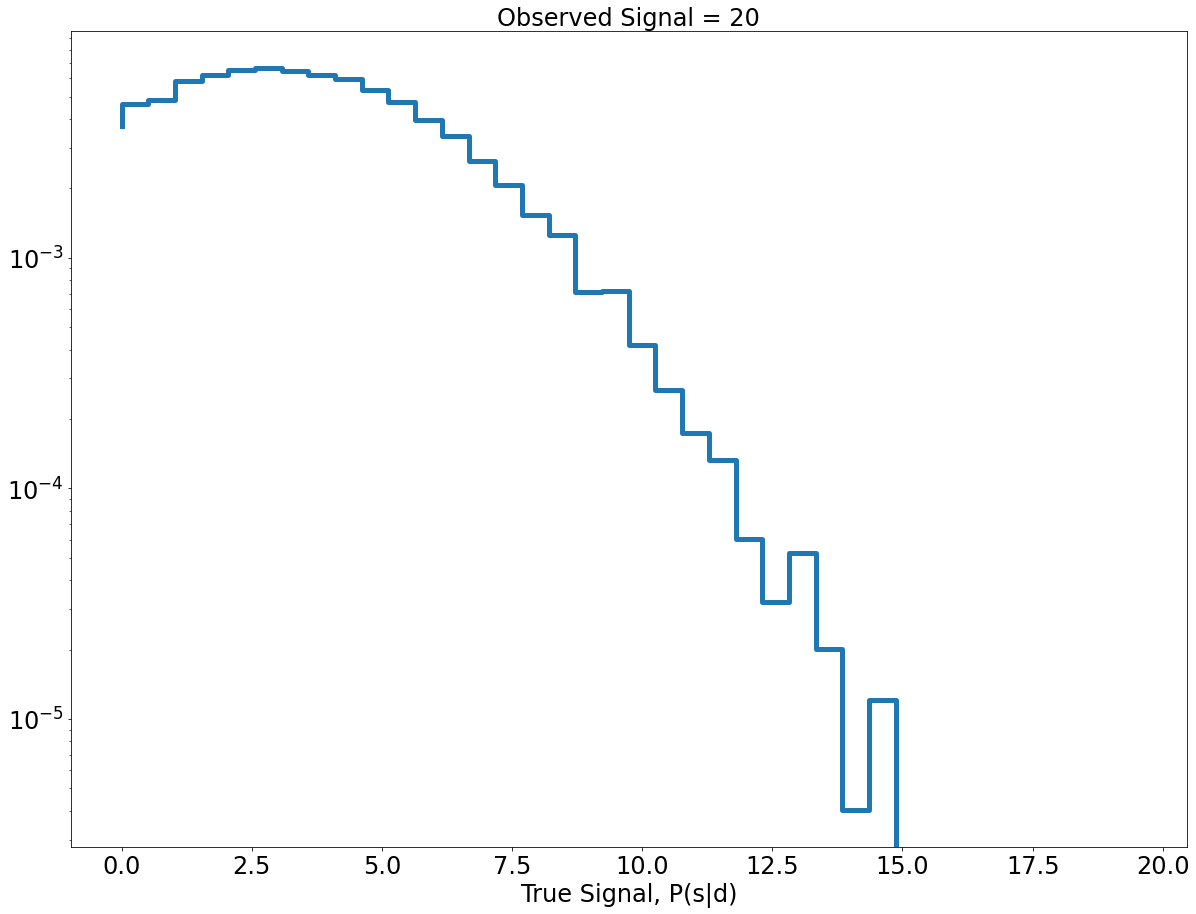

In [103]:
# choose observed data value of 20
vertical = Psd.T[:,20]

plt.step(temp2[:-1], vertical, linewidth = 5)
plt.tick_params(labelsize = 24)
plt.yscale("log")
plt.title("Observed Signal = 20", size = 24)
plt.xlabel("True Signal, P(s|d)", size = 24)
plt.show()

Here I plotted the true signal when the observed signal is 20. At observed signal equals 20, the observed signal shows a slightly Gaussian-like distribution.

Problem 2

Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. (Hint: move it by at least a couple of $σ$). Reproduce the graphs above. Lastly overplot the $P(d|s)$  and $P(s|d)$ plots. Why are they not centered on the same value? Explain carefully.

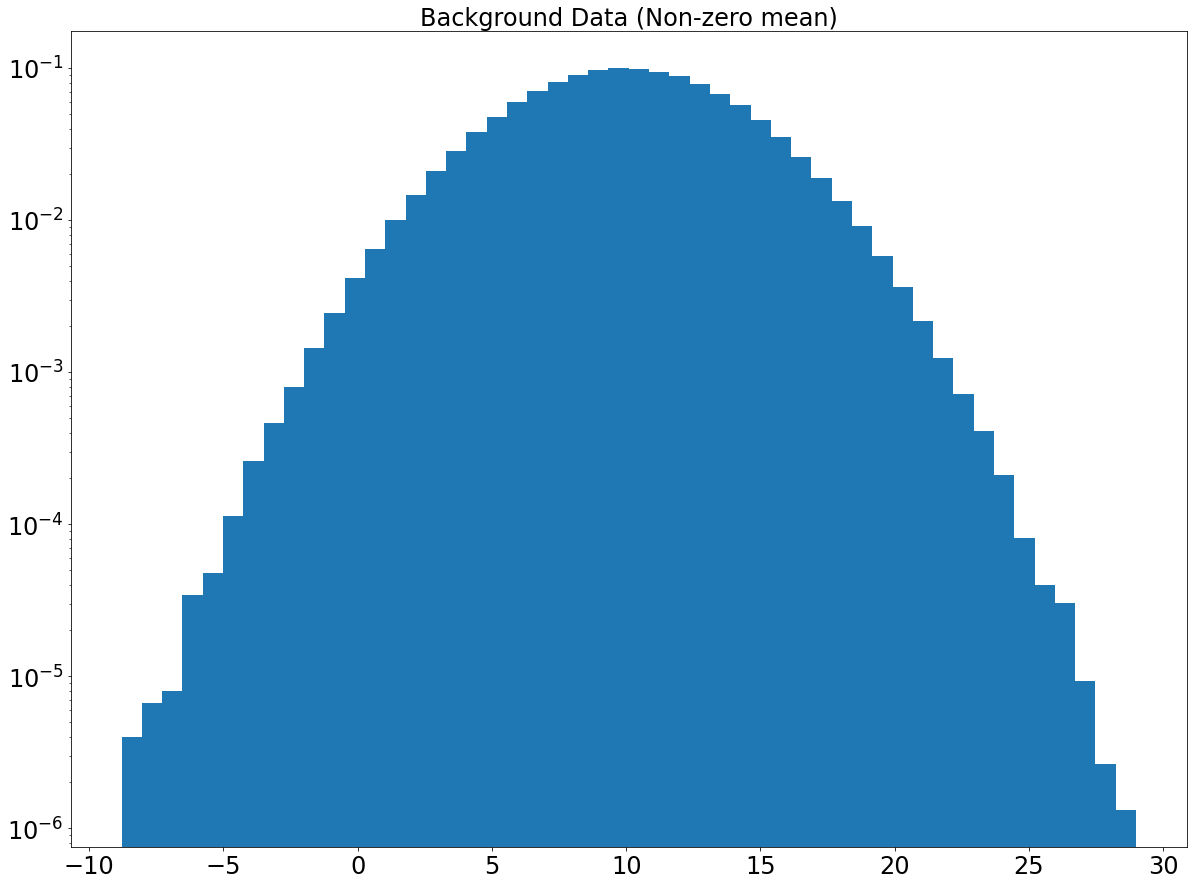

In [126]:
# use 4σ signal, centered at 10
newbkgd = stats.norm.rvs(loc = 10, scale = 4, size = 1000000)

fig, ax = plt.subplots(1, 1)
ax.hist(newbkgd,50, density=True)
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.title("Background Data (Non-zero mean)", size = 24)
plt.show()

Text(0.5, 0, 'Observed data, $P(d|s)$')

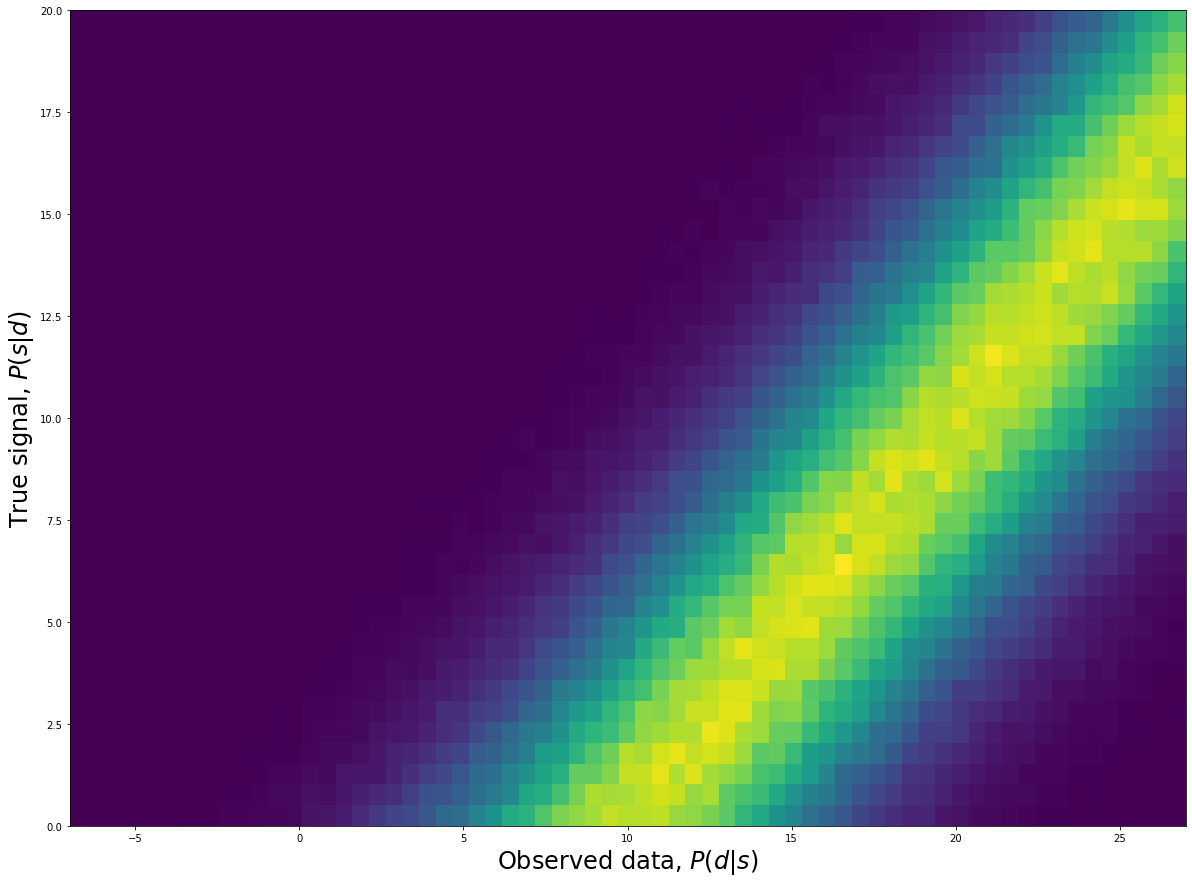

In [127]:
signal = np.random.uniform(0,21, 1000000)
newdata = newbkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2 = np.histogram2d(newdata,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

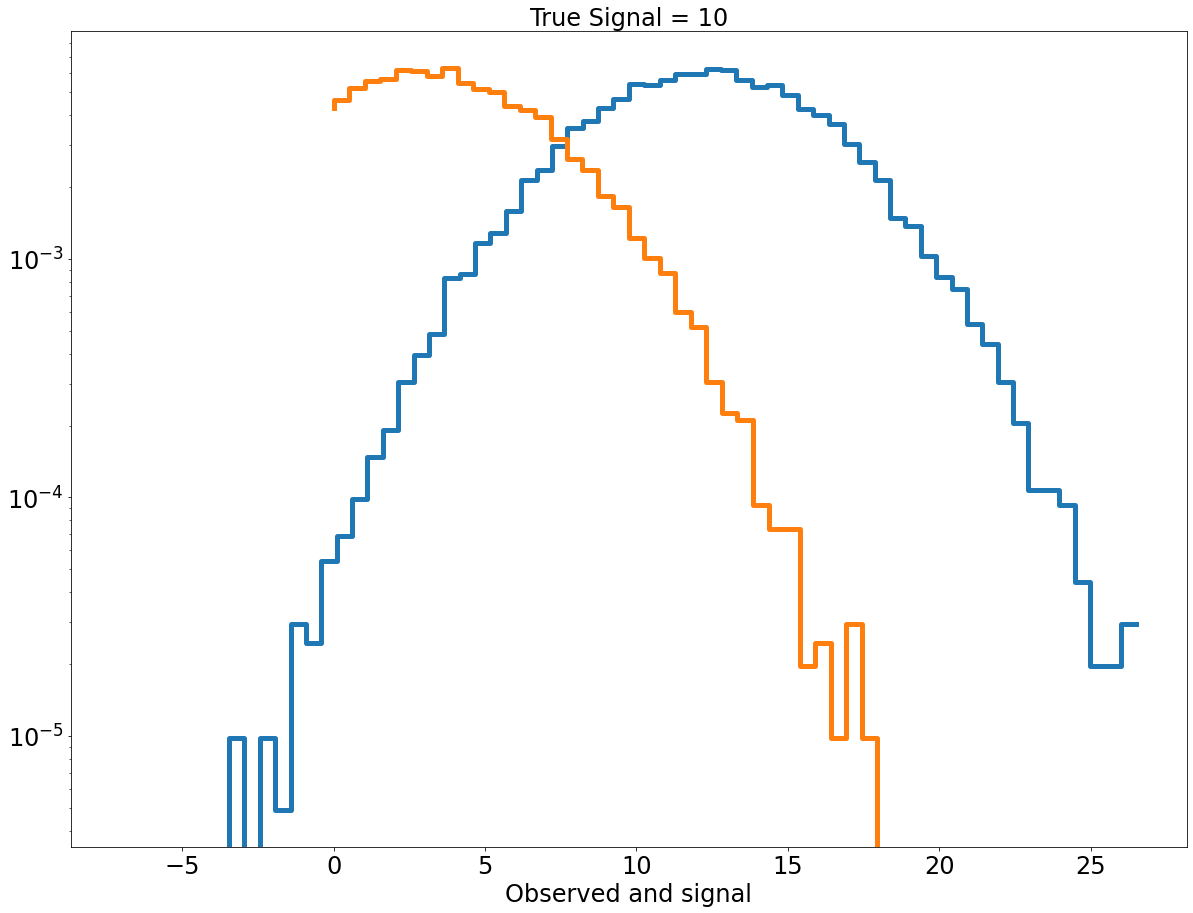

In [136]:
nh = Psd[:,5]
nv = Psd.T[:,40]

plt.step(temp[:-1], nh, linewidth = 5)
plt.step(temp2[:-1], nv, linewidth = 5)
plt.tick_params(labelsize = 24)
plt.yscale("log")
plt.title("True Signal = 10", size = 24)
plt.xlabel("Observed and signal", size = 24)
plt.show()

The two graphs are not centered at the same value because the background data has a non-zero mean. This shifts everything over and thus affects where the observed and true signals are centered at. If the background data's mean was at zero, then both the observed and true signals would be centered at the same value. 